<a href="https://colab.research.google.com/github/fathin123/BigData_Genap_2022/blob/main/UAS_BigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UAS - Big Data

Menggunakan Pyspark dengan dataset Bank Sampah Di Bulan Juli 2016.


Sumber data: 
1. https://data.jakarta.go.id/datasetdata-jumlah-bank-sampah-wil-administrasi-dki-jakarta/resource/2f8e54f6-0f2a-4283-beff-dd3da95ac6f5
2. https://colab.research.google.com/drive/1DG_L31pOV3W2rRMqEj9kkIPkjU3DgBCa#scrollTo=ubzaFAN2YERf


In [1]:
# print working directory
!pwd

# List files and folders
!ls

# Check the open jdk version on colab
!ls /usr/lib/jvm/

/content
sample_data
default-java  java-1.11.0-openjdk-amd64  java-11-openjdk-amd64


In [2]:
# Download and install Java 8
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Ign:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:13 http://archive

In [3]:
# Check if we have java 8 or not
!ls /usr/lib/jvm/

default-java		   java-11-openjdk-amd64     java-8-openjdk-amd64
java-1.11.0-openjdk-amd64  java-1.8.0-openjdk-amd64


In [4]:
# Download Apache Spark binary: This link can change based on the version. Update this link with the latest version before using
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz

# Unzip file
!tar xf spark-3.2.1-bin-hadoop3.2.tgz

In [5]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"

In [6]:
# Install findspark: Adds Pyspark to sys.path at runtime
!pip install -q findspark

# Install pyspark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 45 kB/s 
     |████████████████████████████████| 199 kB 51.0 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=af3d741b9c2108ae29c1570c2dbd0f0b5555d9653701c255f897c54bd081cd28
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [7]:
import findspark
findspark.init()

In [8]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
 .master("local")\
 .appName("Colab")\
 .config('spark.ui.port', '4050')\
 .getOrCreate()

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [17]:
!wget --continue https://data.jakarta.go.id/dataset/data-jumlah-bank-sampah-wil-administrasi-dki-jakarta/resource/2f8e54f6-0f2a-4283-beff-dd3da95ac6f5/BankSampahJuli2016.csv

--2022-06-30 11:41:36--  https://data.jakarta.go.id/dataset/data-jumlah-bank-sampah-wil-administrasi-dki-jakarta/resource/2f8e54f6-0f2a-4283-beff-dd3da95ac6f5/BankSampahJuli2016.csv
Resolving data.jakarta.go.id (data.jakarta.go.id)... 103.209.7.64
Connecting to data.jakarta.go.id (data.jakarta.go.id)|103.209.7.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘BankSampahJuli2016.csv’

BankSampahJuli2016.     [ <=>                ]     833  --.-KB/s    in 0s      

2022-06-30 11:41:38 (20.9 MB/s) - ‘BankSampahJuli2016.csv’ saved [833]



In [24]:
df = pd.read_csv ("/content/BankSampahJuli2016.csv")

In [25]:
df

,wilayah,jml_bank_sampah,jml_nasabah,jenis_sampah,jumlah
0,Jakarta Pusat,145,2707,Kertas,44012.0
1,Jakarta Utara,58,5362,Kertas,16796.5
2,Jakarta Barat,83,3405,Kertas,10189.5
3,Jakarta Selatan,35,3198,Kertas,4596.6
4,Jakarta Timur,98,7157,Kertas,27816.0
5,Jakarta Pusat,145,2707,Plastik,61970.0
6,Jakarta Utara,58,5362,Plastik,17868.8
7,Jakarta Barat,83,3405,Plastik,5793.0
8,Jakarta Selatan,35,3198,Plastik,4189.6
9,Jakarta Timur,98,7157,Plastik,20071.0


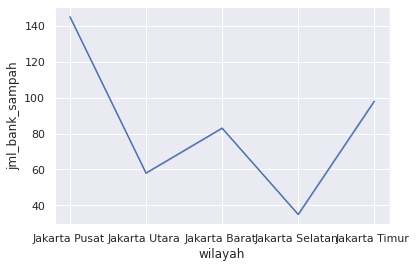

In [26]:
ax = sns.lineplot(x='wilayah', y='jml_bank_sampah', data=df)

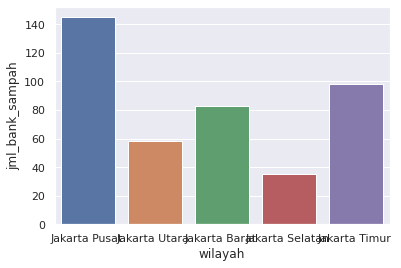

In [27]:
ax = sns.barplot(x='wilayah', y='jml_bank_sampah', data=df)